<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-04-08 18:56:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  28.2MB/s    in 1.2s    

2024-04-08 18:56:35 (28.2 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [63]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [8]:
# your code goes here
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [9]:
QUERY = """
SELECT ConvertedComp
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.dropna(subset=['ConvertedComp'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0
...,...
10577,9600.0
10578,130000.0
10579,19880.0
10580,105000.0


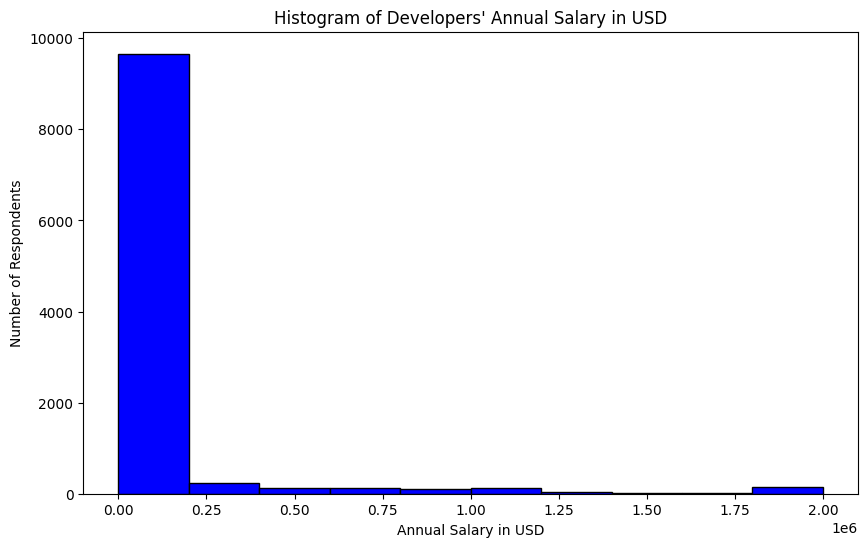

In [14]:
plt.figure(figsize=(10,6))
plt.hist(df['ConvertedComp'], color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Developers\' Annual Salary in USD')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Number of Respondents')

# Showing the plot
plt.show()

### Box Plots


Plot a box plot of `Age.`


In [15]:
QUERY = """
SELECT Age
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df


,Age
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0
...,...
11393,36.0
11394,25.0
11395,34.0
11396,25.0


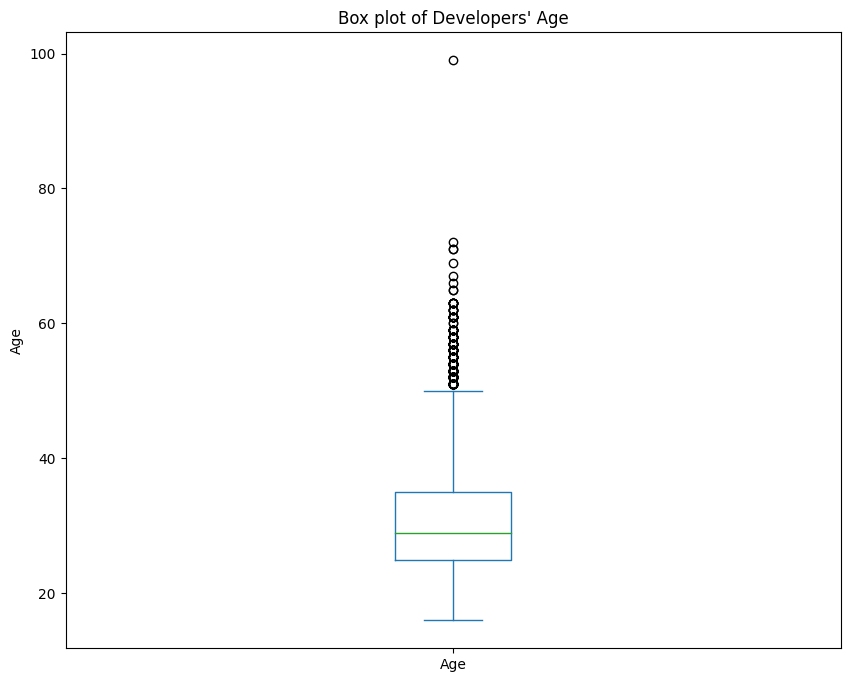

In [16]:
# your code goes here
df.plot(kind='box', figsize=(10,8))

plt.title('Box plot of Developers\' Age')
plt.ylabel('Age')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


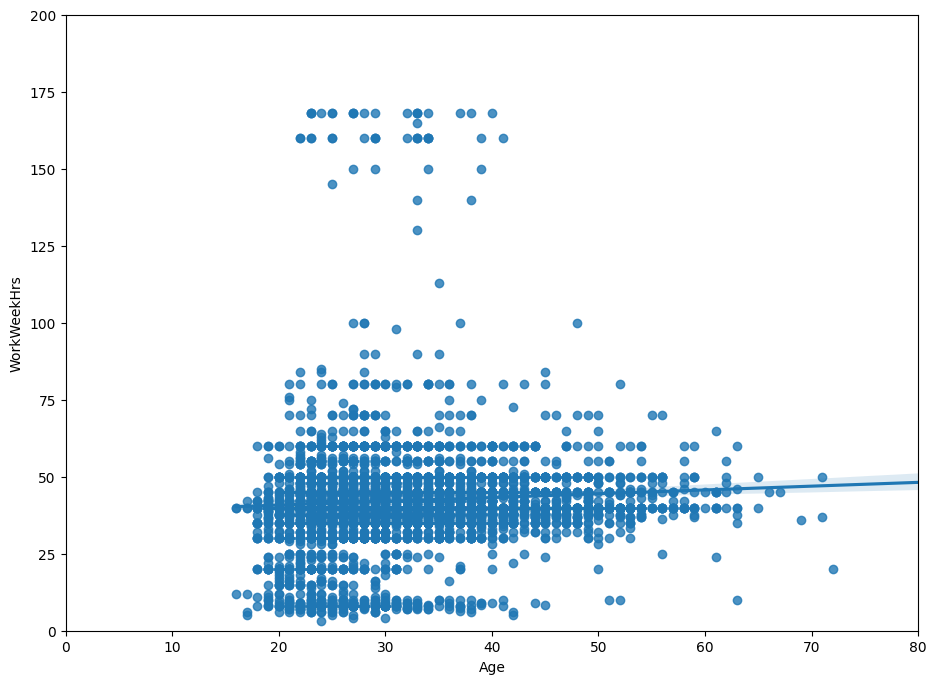

In [21]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

# Age as potential predictor variable of WorkWeekHrs
plt.figure(figsize=(11,8))
sns.regplot(x="Age", y="WorkWeekHrs", data=df)
plt.ylim(0,200)
plt.xlim(0,80)

plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


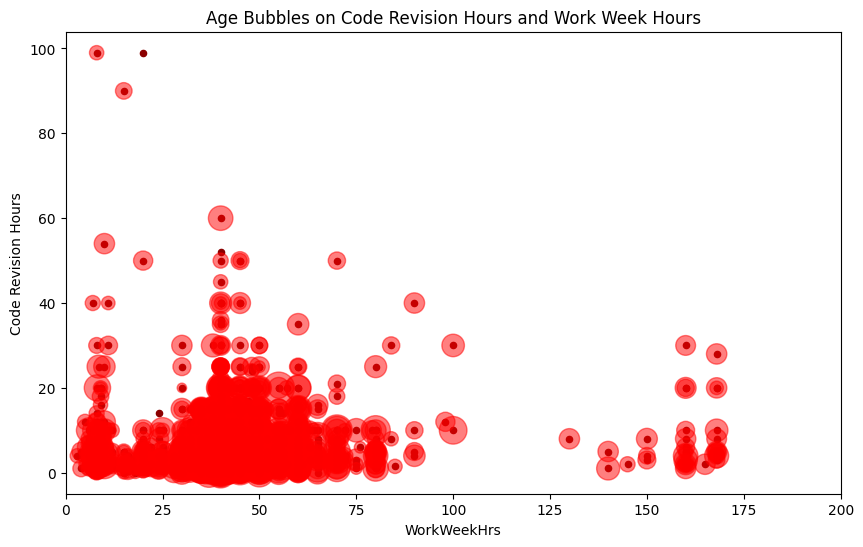

In [24]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

ax = df.plot(kind='scatter', x='WorkWeekHrs', y='CodeRevHrs', figsize=(10, 6), color='darkred')

plt.title('Age Bubbles on Code Revision Hours and Work Week Hours')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.xlim(0,200)
#plt.ylim(0,70)

#sns.regplot(x="WorkWeekHrs", y="CodeRevHrs", data=df)



# normalize Age data
norm_age = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

# Age
ax = df.plot(kind='scatter',
                    x='WorkWeekHrs',
                    y='CodeRevHrs',
                    alpha=0.5,
                    color="red",
                    s=norm_age * 1000 + 10,
                    ax = ax
                   )

ax.set_ylabel('Code Revision Hours')
ax.set_title('Age Bubbles on Code Revision Hours and Work Week Hours')

plt.show()

In [27]:
import plotly.express as px

df_new = df.dropna(axis=0)
fig = px.scatter(df_new, x=["WorkWeekHrs", "CodeRevHrs"], y="Age", size="Age",
                 title="Code Review Hours and Weekly Work Hours vs Age", size_max=50)
fig.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [33]:
# your code goes here
# your code goes here
QUERY = """
SELECT Respondent, DatabaseWorkedWith, COUNT(DatabaseWorkedWith) as count
FROM DatabaseWorkedWith
group by Respondent
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df[(df['DatabaseWorkedWith'] == 'MySQL') & (df['count'] == 1)]



,Respondent,DatabaseWorkedWith,count
10,25,MySQL,1
61,129,MySQL,1
67,147,MySQL,1
68,148,MySQL,1
88,194,MySQL,1
...,...,...,...
10884,25007,MySQL,1
10888,25012,MySQL,1
10919,25091,MySQL,1
10929,25111,MySQL,1


In [34]:
QUERY = """
SELECT Respondent, DatabaseWorkedWith, COUNT(DatabaseWorkedWith) as count
FROM DatabaseWorkedWith
group by DatabaseWorkedWith
HAVING DatabaseWorkedWith LIKE '%SQL%'
order by count desc
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df

,Respondent,DatabaseWorkedWith,count
0,4,MySQL,5469
1,16,Microsoft SQL Server,4110
2,9,PostgreSQL,4097
3,4,SQLite,3248


In [35]:
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(DatabaseDesireNextYear) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc
LIMIT 5
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df

,DatabaseDesireNextYear,count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


In [37]:

# To add labels to each slice
fig.update_traces(textinfo='percent+label')

fig.show()

CREATE TABLE "LanguageDesireNextYear" (
"Respondent" INTEGER,
  "LanguageDesireNextYear" TEXT
)
   LanguageDesireNextYear  Count    percent
13             JavaScript   6630  25.212001
11               HTML/CSS   5328  20.260866
18                 Python   5239  19.922425
22                    SQL   5012  19.059208
25             TypeScript   4088  15.545499


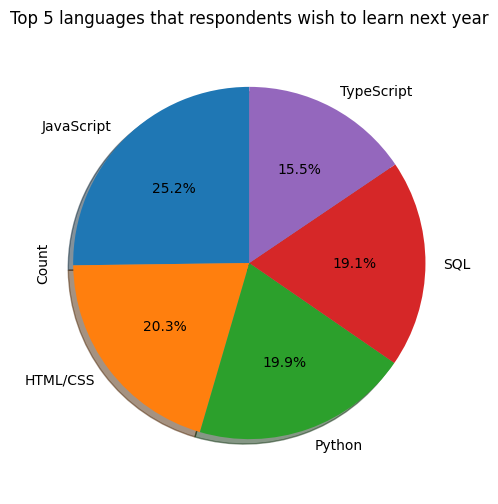

In [64]:
table_name = 'LanguageDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

QUERY = """
SELECT LanguageDesireNextYear, count(LanguageDesireNextYear) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df.sort_values('Count', ascending=False,inplace=True)

df = df.head(5)
total = df.sum(0)[1]

df['percent'] = 100 * df['Count']/total

df.set_index('LanguageDesireNextYear')
print(df)


# autopct create %, start angle represent starting point
df['Count'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            labels=df['LanguageDesireNextYear'])

plt.title('Top 5 languages that respondents wish to learn next year')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [46]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""
df_age = pd.read_sql_query(QUERY,conn)

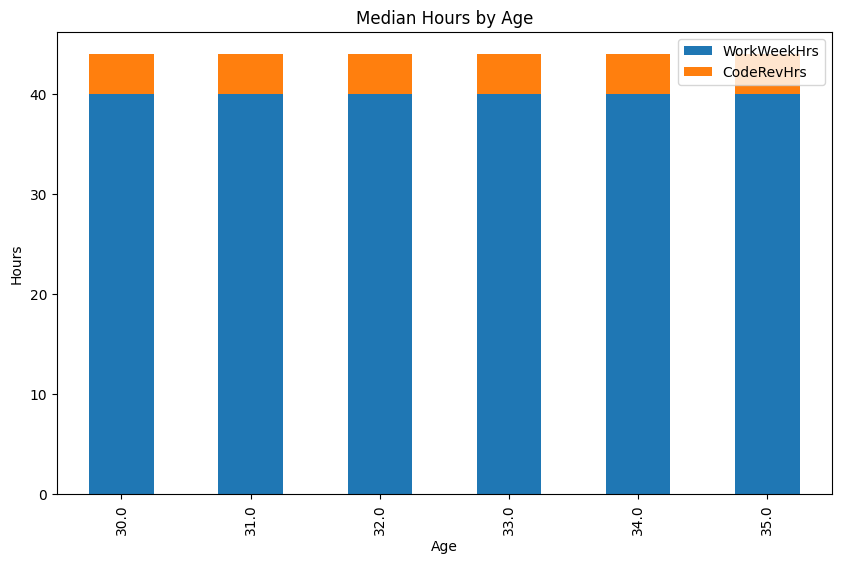

In [47]:
df_age = df_age.groupby('Age', axis=0).median()

df_age[30:35].plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Age') # add to x-label to the plot
plt.ylabel('Hours') # add y-label to the plot
plt.title('Median Hours by Age') # add title to the plot

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [50]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""

df_age = pd.read_sql_query(QUERY, conn)

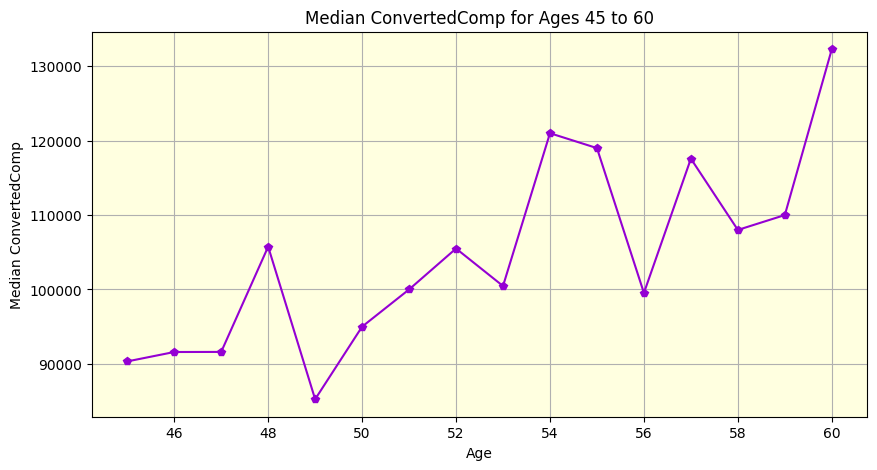

In [58]:
median_compensation_by_age = df_age.groupby('Age')['ConvertedComp'].median().reset_index()

# Plotting the median 'ConvertedComp' by 'Age'
plt.figure(figsize=(10, 5))
plt.plot(median_compensation_by_age['Age'], median_compensation_by_age['ConvertedComp'], marker='p', color="darkviolet")
plt.gca().set_facecolor('lightyellow')

plt.title('Median ConvertedComp for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.grid(True)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [59]:
# your code goes here

QUERY = """
SELECT MainBranch, COUNT(*) as Number_of_Respondents
FROM master
group by MainBranch
order by Number_of_Respondents
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
# df.set_index('MainBranch', inplace=True)
# df['Number_of_Respondents'] = df['Number_of_Respondents'].astype(int)
df

fig = px.bar(df, x="Number_of_Respondents", y="MainBranch", orientation='h')
fig.show()

In [65]:
table_name = 'DevType'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

#step 1: get the data needed
QUERY = """
SELECT DevType, count(DevType) as Count
FROM DevType
GROUP BY DevType
"""
df_type = pd.read_sql_query(QUERY,conn)
df_type = df_type.sort_values('Count', ascending=False)
df_type.head()

CREATE TABLE "DevType" (
"Respondent" INTEGER,
  "DevType" TEXT
)


,DevType,Count
11,"Developer, full-stack",6928
7,"Developer, back-end",6290
10,"Developer, front-end",3920
8,"Developer, desktop or enterprise applications",2575
13,"Developer, mobile",1959


Close the database connection.


In [66]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
